# Gradient Descent

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

## Linear Algebra with Numpy

In [2]:
a = np.array([1, 3, 2, 4])

In [3]:
a

array([1, 3, 2, 4])

In [4]:
type(a)

numpy.ndarray

In [5]:
A = np.array([[3, 1, 2],
              [2, 3, 4]])

B = np.array([[0, 1],
              [2, 3],
              [4, 5]])

C = np.array([[0, 1],
              [2, 3],
              [4, 5],
              [0, 1],
              [2, 3],
              [4, 5]])

print("A is a {} matrix".format(A.shape))
print("B is a {} matrix".format(B.shape))
print("C is a {} matrix".format(C.shape))

A is a (2, 3) matrix
B is a (3, 2) matrix
C is a (6, 2) matrix


In [6]:
A[0]

array([3, 1, 2])

In [7]:
C[2, 0]

4

In [8]:
B[:, 0]

array([0, 2, 4])

### Elementwise operations

In [9]:
3 * A

array([[ 9,  3,  6],
       [ 6,  9, 12]])

In [10]:
A + A

array([[6, 2, 4],
       [4, 6, 8]])

In [11]:
A * A

array([[ 9,  1,  4],
       [ 4,  9, 16]])

In [12]:
A / A

array([[1., 1., 1.],
       [1., 1., 1.]])

In [13]:
A - A

array([[0, 0, 0],
       [0, 0, 0]])

Uncomment the code in the next cells. You will see that tensors of different shape cannot be added or multiplied:

In [14]:
# A + B

In [15]:
# A * B

### Dot product

In [16]:
A.shape

(2, 3)

In [17]:
B.shape

(3, 2)

In [18]:
A.dot(B)

array([[10, 16],
       [22, 31]])

In [ ]:
np.dot(A, B)

In [ ]:
B.dot(A)

In [ ]:
C.shape

In [ ]:
A.shape

In [ ]:
C.dot(A)

Uncomment the code in the next cell to visualize the error:

In [ ]:
# A.dot(C)

## Gradient descent

![](../data/banknotes.png)

In [19]:
df = pd.read_csv('../data/banknotes.csv')

In [20]:
df.head()

,variace,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [22]:
df['class'].value_counts()

0    762
1    610
Name: class, dtype: int64

In [23]:
import seaborn as sns

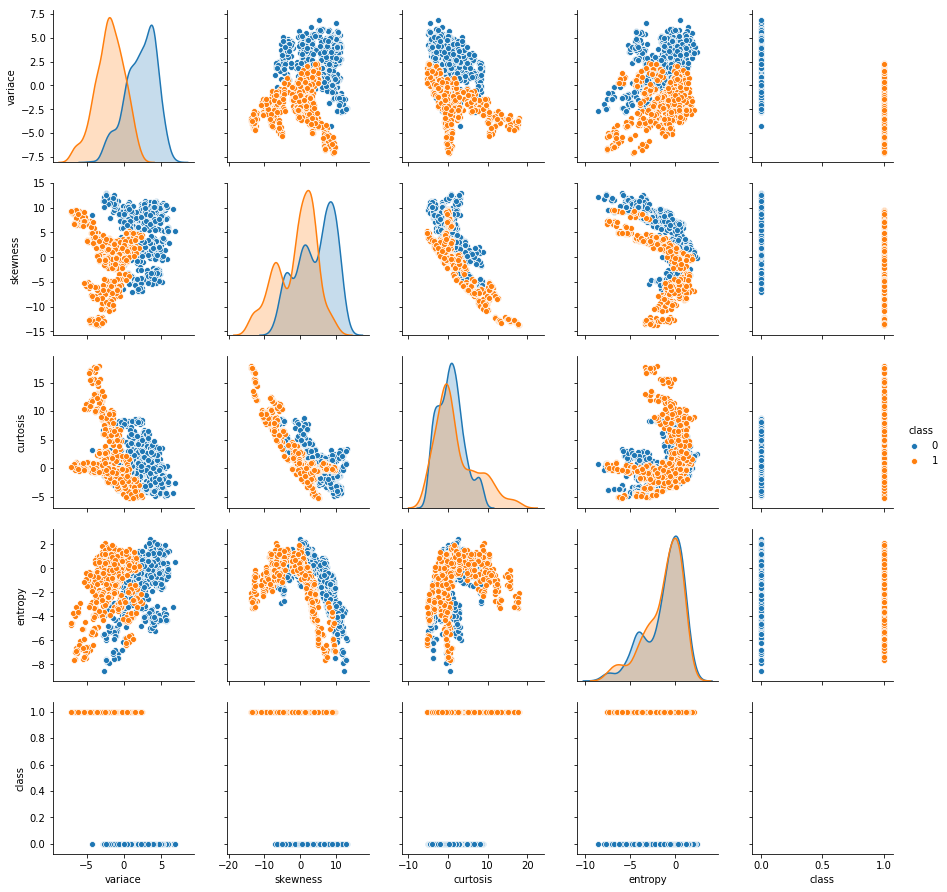

In [25]:
sns.pairplot(df, hue="class");

#### Baseline model

In [26]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import scale

In [27]:
X = scale(df.drop('class', axis=1).values)
y = df['class'].values

In [30]:
model = RandomForestClassifier(n_estimators=5)
cross_val_score(model, X, y, cv=3)

array([0.99126638, 0.98249453, 0.98905908])

### Logistic Regression Model

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42)

In [32]:
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

Using TensorFlow backend.


In [33]:
K.clear_session()

model = Sequential()
model.add(Dense(1, input_shape=(4,), activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

history = model.fit(X_train, y_train)
result = model.evaluate(X_test, y_test)

Epoch 1/1
412/412 [==============================] - 0s 272us/step


In [34]:
historydf = pd.DataFrame(history.history, index=history.epoch)

In [36]:
historydf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 0 to 0
Data columns (total 2 columns):
loss    1 non-null float64
acc     1 non-null float64
dtypes: float64(2)
memory usage: 24.0 bytes


Text(0.5, 1.0, 'Test accuracy: 55.3 %')

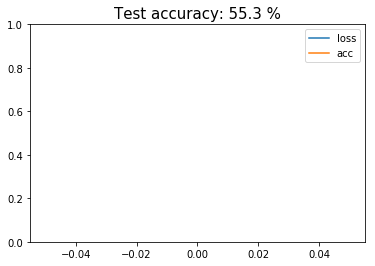

In [35]:
historydf.plot(ylim=(0,1))
plt.title("Test accuracy: {:3.1f} %".format(result[1]*100), fontsize=15)

### Learning Rates

In [37]:
dflist = []

learning_rates = [0.01, 0.05, 0.1, 0.5]

for lr in learning_rates:

    K.clear_session()

    model = Sequential()
    model.add(Dense(1, input_shape=(4,), activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                  optimizer=SGD(lr=lr),
                  metrics=['accuracy'])
    h = model.fit(X_train, y_train, batch_size=16, verbose=0)
    
    dflist.append(pd.DataFrame(h.history, index=h.epoch))

In [41]:
h.params

{'batch_size': 16,
 'epochs': 1,
 'steps': None,
 'samples': 960,
 'verbose': 0,
 'do_validation': False,
 'metrics': ['loss', 'acc']}

In [42]:
historydf = pd.concat(dflist, axis=1)

In [43]:
historydf

,loss,acc,loss,acc,loss,acc,loss,acc
0,0.793868,0.575,0.451153,0.775,0.480375,0.819792,0.275604,0.926042


In [44]:
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([learning_rates, metrics_reported],
                                 names=['learning_rate', 'metric'])

historydf.columns = idx

In [45]:
historydf

learning_rate      0.01             0.05             0.10                0.50  \
metric             loss    acc      loss    acc      loss       acc      loss   
0              0.793868  0.575  0.451153  0.775  0.480375  0.819792  0.275604   

learning_rate            
metric              acc  
0              0.926042

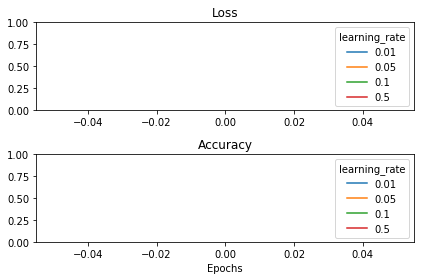

In [46]:
ax = plt.subplot(211)
historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Loss")

ax = plt.subplot(212)
historydf.xs('acc', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")

plt.tight_layout()

### Batch Sizes

In [47]:
dflist = []

batch_sizes = [16, 32, 64, 128]

for batch_size in batch_sizes:
    K.clear_session()

    model = Sequential()
    model.add(Dense(1, input_shape=(4,), activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                  optimizer='sgd',
                  metrics=['accuracy'])
    h = model.fit(X_train, y_train, batch_size=batch_size, verbose=0)
    
    dflist.append(pd.DataFrame(h.history, index=h.epoch))

In [48]:
historydf = pd.concat(dflist, axis=1)
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([batch_sizes, metrics_reported],
                                 names=['batch_size', 'metric'])
historydf.columns = idx

In [49]:
historydf

batch_size       16               32                  64                  128  \
metric          loss    acc      loss       acc      loss       acc      loss   
0           0.573744  0.725  1.169002  0.052083  0.575057  0.717708  0.604701   

batch_size            
metric           acc  
0           0.672917

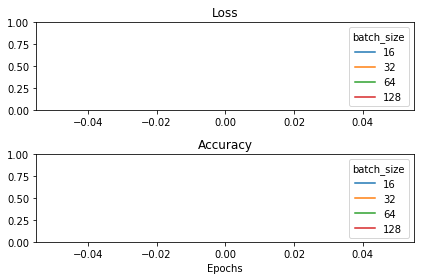

In [50]:
ax = plt.subplot(211)
historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Loss")

ax = plt.subplot(212)
historydf.xs('acc', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")

plt.tight_layout()

## Optimizers

In [51]:
from keras.optimizers import SGD, Adam, Adagrad, RMSprop

In [52]:
dflist = []

optimizers = ['SGD(lr=0.01)',
              'SGD(lr=0.01, momentum=0.3)',
              'SGD(lr=0.01, momentum=0.3, nesterov=True)',  
              'Adam(lr=0.01)',
              'Adagrad(lr=0.01)',
              'RMSprop(lr=0.01)']

for opt_name in optimizers:

    K.clear_session()
    
    model = Sequential()
    model.add(Dense(1, input_shape=(4,), activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                  optimizer=eval(opt_name),
                  metrics=['accuracy'])
    h = model.fit(X_train, y_train, batch_size=16, epochs=5, verbose=0)
    
    dflist.append(pd.DataFrame(h.history, index=h.epoch))

In [53]:
historydf = pd.concat(dflist, axis=1)
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([optimizers, metrics_reported],
                                 names=['optimizers', 'metric'])
historydf.columns = idx

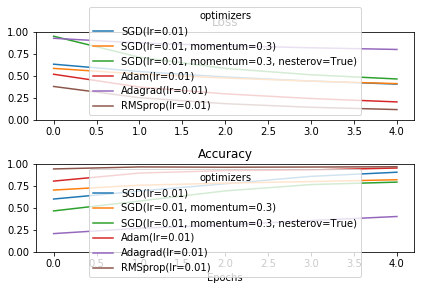

In [54]:
ax = plt.subplot(211)
historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Loss")

ax = plt.subplot(212)
historydf.xs('acc', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")

plt.tight_layout()

## Initialization

https://keras.io/initializers/

In [55]:
dflist = []

initializers = ['zeros', 'uniform', 'normal',
                'he_normal', 'lecun_uniform']

for init in initializers:

    K.clear_session()

    model = Sequential()
    model.add(Dense(1, input_shape=(4,),
                    kernel_initializer=init,
                    activation='sigmoid'))

    model.compile(loss='binary_crossentropy',
                  optimizer='rmsprop',
                  metrics=['accuracy'])

    h = model.fit(X_train, y_train, batch_size=16, epochs=5, verbose=0)
    
    dflist.append(pd.DataFrame(h.history, index=h.epoch))

In [56]:
historydf = pd.concat(dflist, axis=1)
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([initializers, metrics_reported],
                                 names=['initializers', 'metric'])

historydf.columns = idx

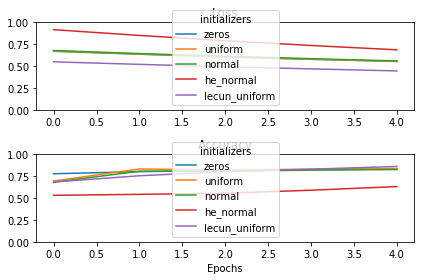

In [57]:
ax = plt.subplot(211)
historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Loss")

ax = plt.subplot(212)
historydf.xs('acc', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")

plt.tight_layout()

## Inner layer representation

In [58]:
K.clear_session()

model = Sequential()
model.add(Dense(2, input_shape=(4,), activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.01),
              metrics=['accuracy'])

h = model.fit(X_train, y_train, batch_size=16, epochs=20,
              verbose=1, validation_split=0.3)
result = model.evaluate(X_test, y_test)

Train on 672 samples, validate on 288 samples
Epoch 1/20
672/672 [==============================] - 1s 1ms/step - loss: 0.7225 - acc: 0.5670 - val_loss: 0.6652 - val_acc: 0.6007
Epoch 2/20
672/672 [==============================] - 0s 196us/step - loss: 0.5821 - acc: 0.7708 - val_loss: 0.4870 - val_acc: 0.9132
Epoch 3/20
672/672 [==============================] - 0s 169us/step - loss: 0.3982 - acc: 0.9360 - val_loss: 0.3073 - val_acc: 0.9653
Epoch 4/20
672/672 [==============================] - 0s 181us/step - loss: 0.2730 - acc: 0.9583 - val_loss: 0.2125 - val_acc: 0.9757
Epoch 5/20
672/672 [==============================] - 0s 160us/step - loss: 0.1991 - acc: 0.9732 - val_loss: 0.1546 - val_acc: 0.9826
Epoch 6/20
672/672 [==============================] - 0s 210us/step - loss: 0.1509 - acc: 0.9777 - val_loss: 0.1152 - val_acc: 0.9861
Epoch 7/20
672/672 [==============================] - 0s 151us/step - loss: 0.1161 - acc: 0.9762 - val_loss: 0.0916 - val_acc: 0.9861
Epoch 8/20
672/672

In [59]:
result

[0.014786242046257824, 0.9975728155339806]

In [60]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 2)                 10        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 3         
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


In [61]:
model.layers

In [62]:
inp = model.layers[0].input
out = model.layers[0].output

In [63]:
inp

<tf.Tensor 'dense_1_input:0' shape=(?, 4) dtype=float32>

In [64]:
out

<tf.Tensor 'dense_1/Relu:0' shape=(?, 2) dtype=float32>

In [65]:
features_function = K.function([inp], [out])

In [66]:
features_function

In [67]:
features_function([X_test])[0].shape

(412, 2)

In [68]:
features = features_function([X_test])[0]

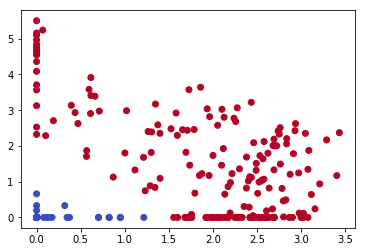

In [69]:
plt.scatter(features[:, 0], features[:, 1], c=y_test, cmap='coolwarm')

In [70]:
K.clear_session()

model = Sequential()
model.add(Dense(3, input_shape=(4,), activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.01),
              metrics=['accuracy'])

412/412 [==============================] - 0s 67us/step


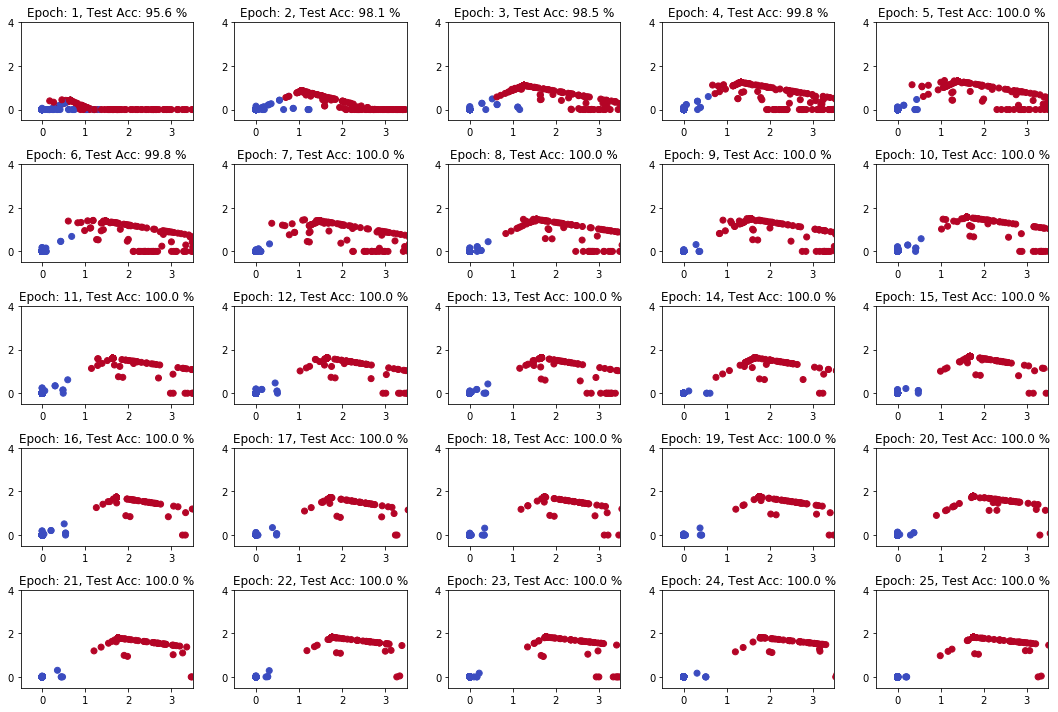

In [71]:
inp = model.layers[0].input
out = model.layers[1].output
features_function = K.function([inp], [out])

plt.figure(figsize=(15,10))

for i in range(1, 26):
    plt.subplot(5, 5, i)
    h = model.fit(X_train, y_train, batch_size=16, epochs=1, verbose=0)
    test_accuracy = model.evaluate(X_test, y_test)[1]
    features = features_function([X_test])[0]
    plt.scatter(features[:, 0], features[:, 1], c=y_test, cmap='coolwarm')
    plt.xlim(-0.5, 3.5)
    plt.ylim(-0.5, 4.0)
    plt.title('Epoch: {}, Test Acc: {:3.1f} %'.format(i, test_accuracy * 100.0))

plt.tight_layout()

### Exercise 1

You've just been hired at a wine company and they would like you to help them build a model that predicts the quality of their wine based on several measurements. They give you a dataset with wine

- Load the ../data/wines.csv into Pandas
- Use the column called "Class" as target
- Check how many classes are there in target, and if necessary use dummy columns for a multi-class classification
- Use all the other columns as features, check their range and distribution (using seaborn pairplot)
- Rescale all the features using either MinMaxScaler or StandardScaler
- Build a deep model with at least 1 hidden layer to classify the data
- Choose the cost function, what will you use? Mean Squared Error? Binary Cross-Entropy? Categorical Cross-Entropy?
- Choose an optimizer
- Choose a value for the learning rate, you may want to try with several values
- Choose a batch size
- Train your model on all the data using a `validation_split=0.2`. Can you converge to 100% validation accuracy?
- What's the minumum number of epochs to converge?
- Repeat the training several times to verify how stable your results are

In [81]:
df_wines = pd.read_csv("../data/wines.csv")

In [82]:
df_wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
Class                           178 non-null int64
Alcohol                         178 non-null float64
Malic_acid                      178 non-null float64
Ash                             178 non-null float64
Alcalinity_of_ash               178 non-null float64
Magnesium                       178 non-null int64
Total_phenols                   178 non-null float64
Flavanoids                      178 non-null float64
Nonflavanoid_phenols            178 non-null float64
Proanthocyanins                 178 non-null float64
Color_intensity                 178 non-null float64
Hue                             178 non-null float64
OD280-OD315_of_diluted_wines    178 non-null float64
Proline                         178 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.5 KB


In [99]:
df_wines['Class'].value_counts()

2    71
1    59
3    48
Name: Class, dtype: int64

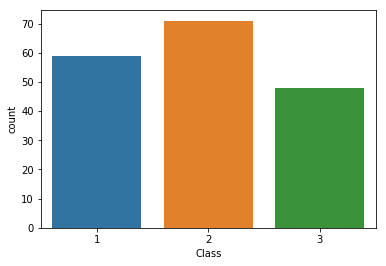

In [106]:
sns.countplot(df_wines['Class'])

/home/sushil/anaconda3/envs/ztdl/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/sushil/anaconda3/envs/ztdl/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/sushil/anaconda3/envs/ztdl/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/home/sushil/anaconda3/envs/ztdl/lib/python3.6/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.red

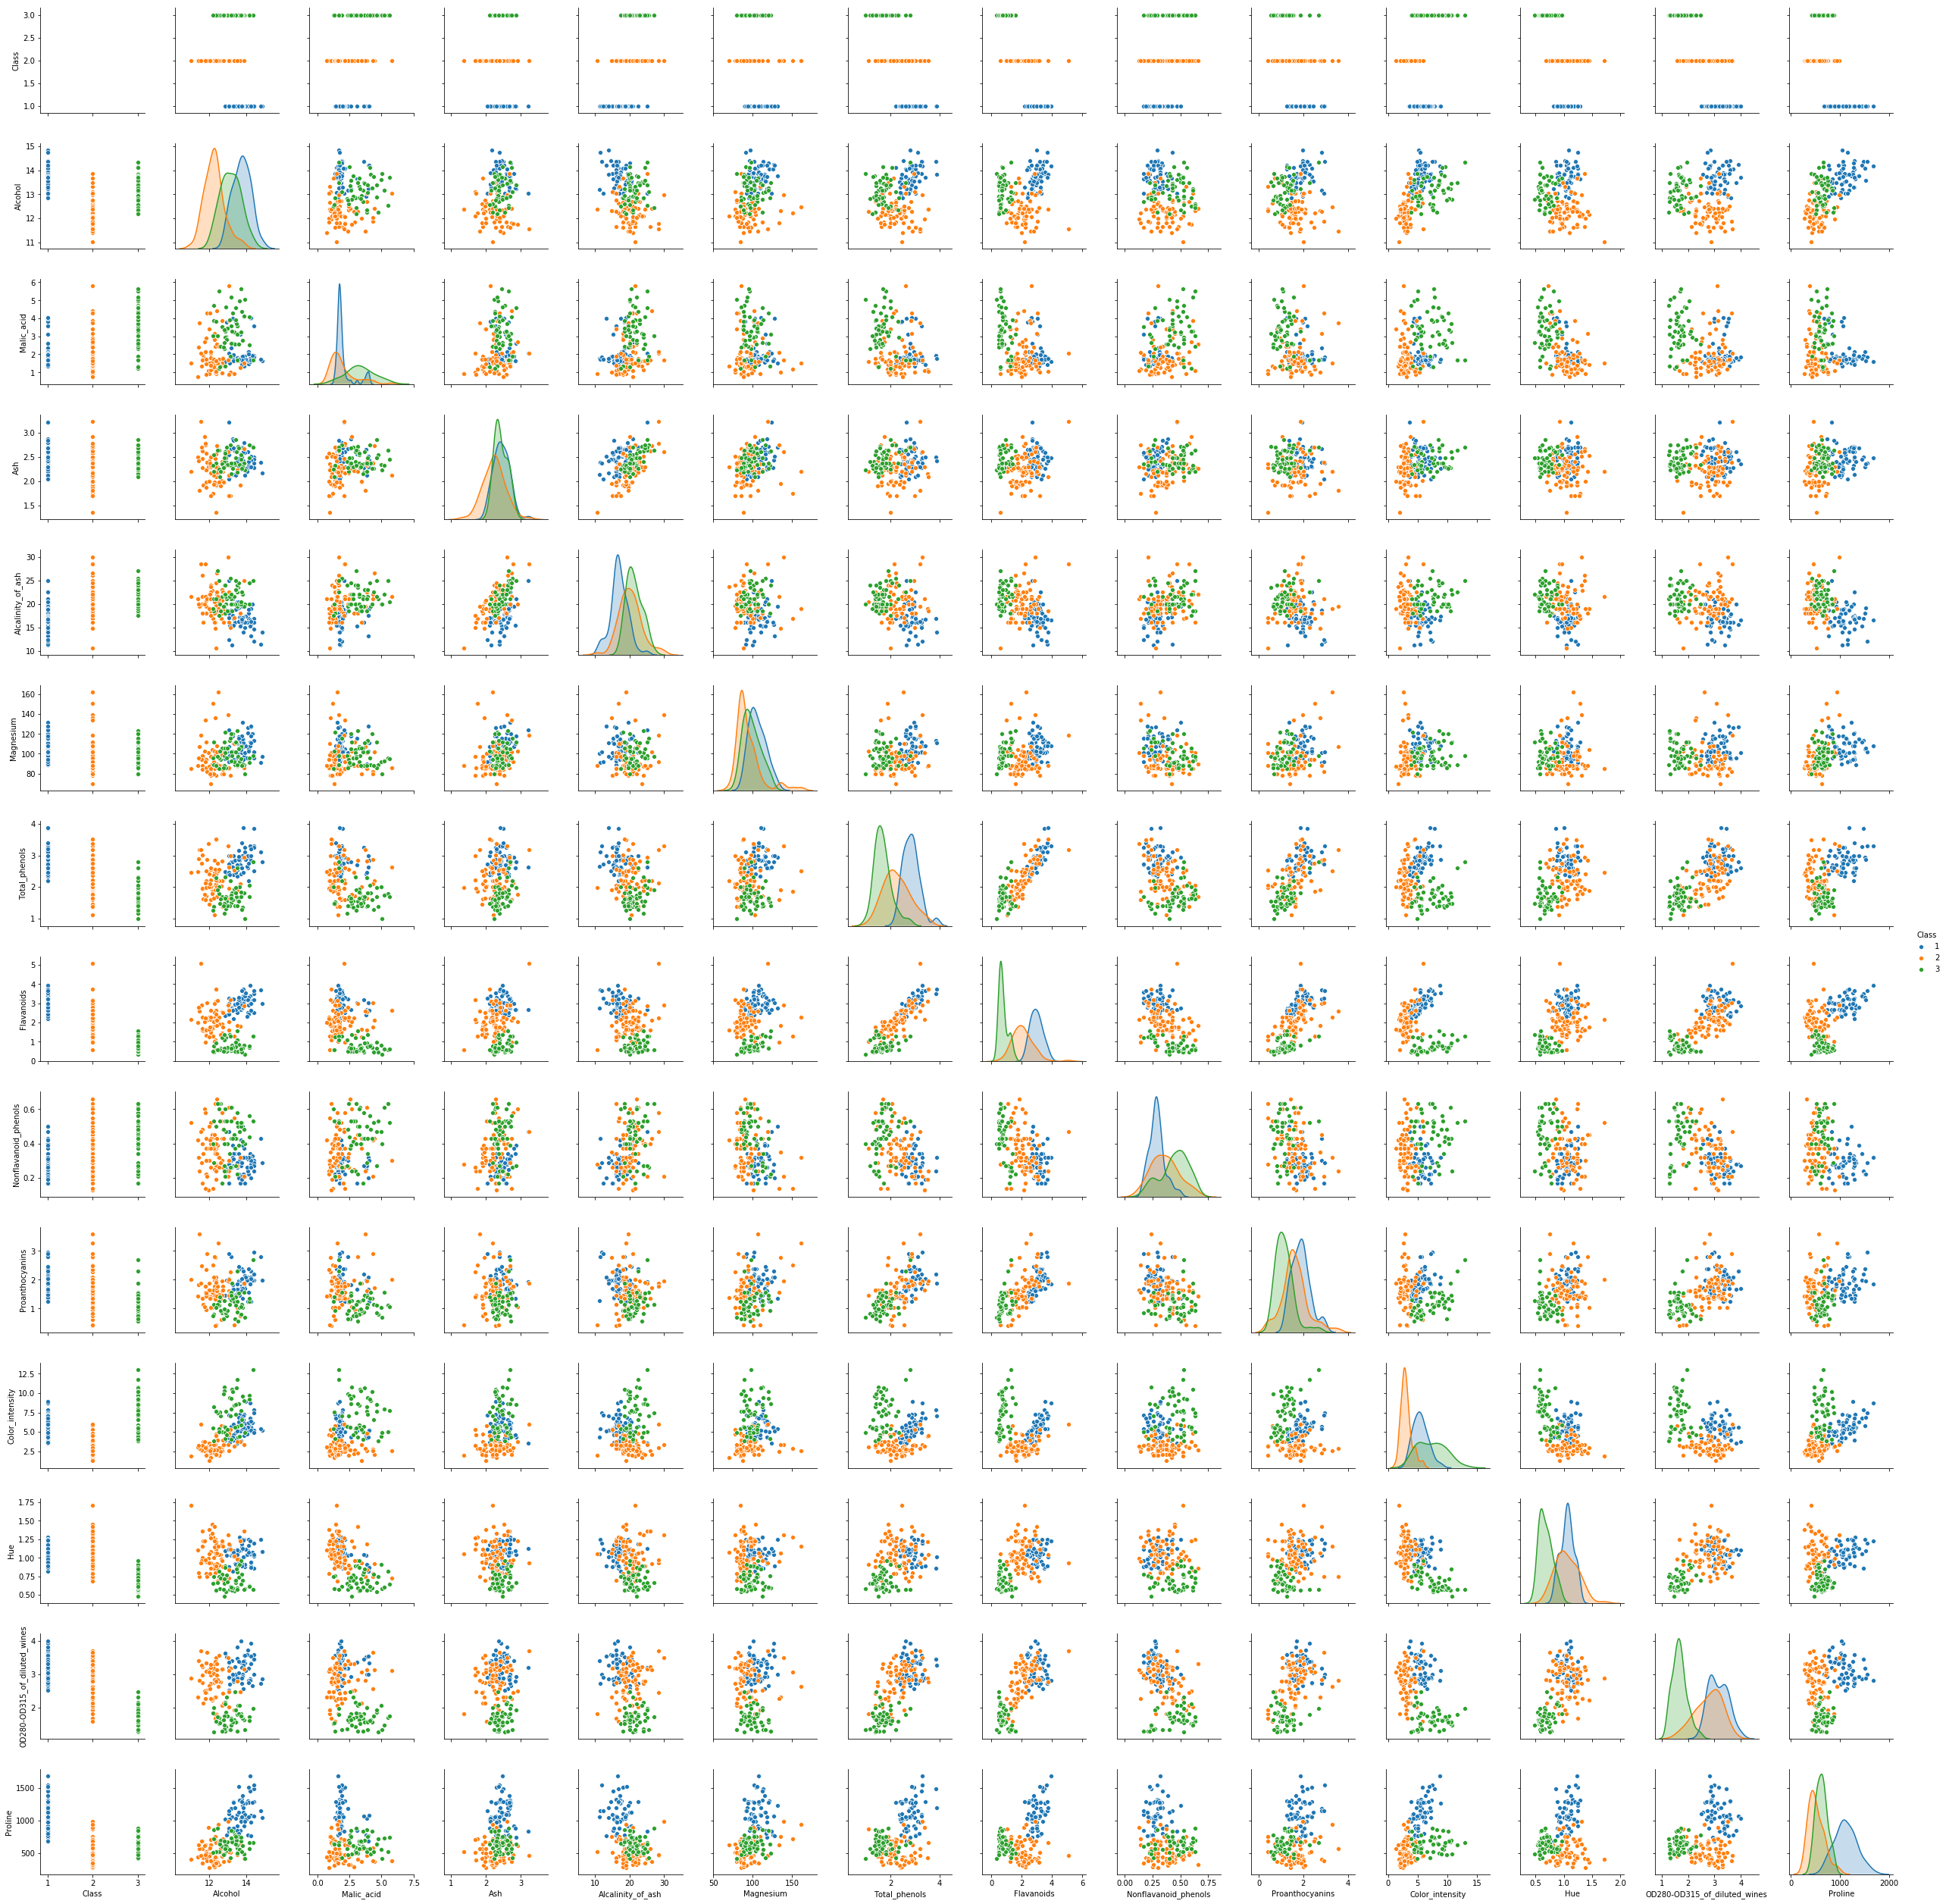

In [110]:
sns.pairplot(df_wines, hue = 'Class');

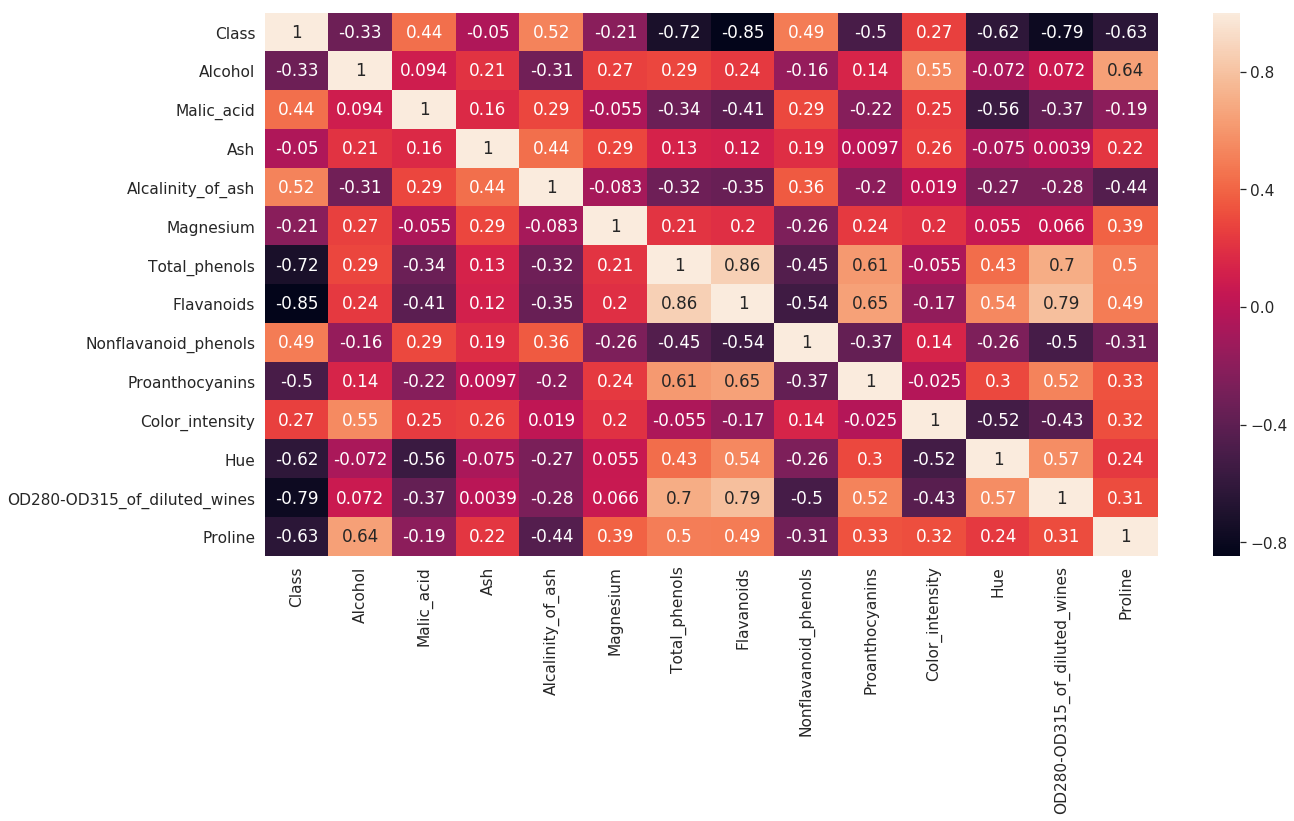

In [115]:
sns.set(font_scale=1.4)
ig, ax = plt.subplots(figsize=(20,10))         # figsize in inches
sns.heatmap(df_wines.corr(), annot=True, ax = ax)

In [128]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline

In [87]:
scaler = StandardScaler()

In [91]:
y = df_wines["Class"]
X = df_wines.drop('Class', axis=1)
X_scaled = scaler.fit_transform(X) 

/home/sushil/anaconda3/envs/ztdl/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/sushil/anaconda3/envs/ztdl/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [118]:
from keras.utils import np_utils
from keras.wrappers.scikit_learn import KerasClassifier

In [122]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y)
encoded_y = encoder.transform(y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_y)

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, dummy_y, test_size = .3, random_state = 123)

In [124]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(124, 13) (54, 13) (124, 3) (54, 3)


In [141]:
from keras.models import Sequential
from keras.layers import Dense

In [139]:
#model_wine = Sequential()

In [143]:
# define baseline model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(13, input_dim=13, activation='relu'))
    model.add(Dense(13, activation='relu'))
    model.add(Dense(3, activation='sigmoid'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [150]:
estimator = KerasClassifier(build_fn=baseline_model, epochs=20, batch_size=5)

In [151]:
kfold = KFold(n_splits=3, shuffle = False, random_state=123)

In [152]:
results = cross_val_score(estimator, X_train, y_train, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Epoch 1/20
82/82 [==============================] - 1s 11ms/step - loss: 1.0530 - acc: 0.4878
Epoch 2/20
82/82 [==============================] - 0s 1ms/step - loss: 0.9949 - acc: 0.5854
Epoch 3/20
82/82 [==============================] - 0s 1ms/step - loss: 0.9372 - acc: 0.7073
Epoch 4/20
82/82 [==============================] - 0s 1ms/step - loss: 0.8812 - acc: 0.7927
Epoch 5/20
82/82 [==============================] - 0s 1ms/step - loss: 0.8213 - acc: 0.8293
Epoch 6/20
82/82 [==============================] - 0s 1ms/step - loss: 0.7616 - acc: 0.8537
Epoch 7/20
82/82 [==============================] - 0s 1ms/step - loss: 0.6995 - acc: 0.8659
Epoch 8/20
82/82 [==============================] - 0s 1ms/step - loss: 0.6341 - acc: 0.8902
Epoch 9/20
82/82 [==============================] - 0s 1ms/step - loss: 0.5710 - acc: 0.8902
Epoch 10/20
82/82 [==============================] - 0s 1ms/step - loss: 0.4962 - acc: 0.8902
Epoch 11/20
82/82 [==============================] - 0s 1ms/step - l

In [132]:
estimator.fit(X_t, y_train)
predictions = estimator.predict(X_test)
#print(predictions)
#print(encoder.inverse_transform(predictions))



In [ ]:
accuracy()

### Exercise 2

Since this dataset has 13 features we can only visualize pairs of features like we did in the Paired plot. We could however exploit the fact that a neural network is a function to extract 2 high level features to represent our data.

- Build a deep fully connected network with the following structure:
    - Layer 1: 8 nodes
    - Layer 2: 5 nodes
    - Layer 3: 2 nodes
    - Output : 3 nodes
- Choose activation functions, inizializations, optimizer and learning rate so that it converges to 100% accuracy within 20 epochs (not easy)
- Remember to train the model on the scaled data
- Define a Feature Funtion like we did above between the input of the 1st layer and the output of the 3rd layer
- Calculate the features and plot them on a 2-dimensional scatter plot
- Can we distinguish the 3 classes well?


### Exercise 3

Keras functional API. So far we've always used the Sequential model API in Keras. However, Keras also offers a Functional API, which is much more powerful. You can find its [documentation here](https://keras.io/getting-started/functional-api-guide/). Let's see how we can leverage it.

- define an input layer called `inputs`
- define two hidden layers as before, one with 8 nodes, one with 5 nodes
- define a `second_to_last` layer with 2 nodes
- define an output layer with 3 nodes
- create a model that connect input and output
- train it and make sure that it converges
- define a function between inputs and second_to_last layer
- recalculate the features and plot them

### Exercise 4 

Keras offers the possibility to call a function at each epoch. These are Callbacks, and their [documentation is here](https://keras.io/callbacks/). Callbacks allow us to add some neat functionality. In this exercise we'll explore a few of them.

- Split the data into train and test sets with a test_size = 0.3 and random_state=42
- Reset and recompile your model
- train the model on the train data using `validation_data=(X_test, y_test)`
- Use the `EarlyStopping` callback to stop your training if the `val_loss` doesn't improve
- Use the `ModelCheckpoint` callback to save the trained model to disk once training is finished
- Use the `TensorBoard` callback to output your training information to a `/tmp/` subdirectory
- Watch the next video for an overview of tensorboard